# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,4757.639,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.8,1871
1,2,False,836225,en,1561.390,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,245
2,3,False,912598,ja,949.924,/kk28Lk8oQBGjoHRGUCN2vxKb4O2.jpg,Bubble,7.6,152
3,4,False,831728,de,692.172,/xvgmSslUbi416VwsW1C1Cp90yX.jpg,Snotty Boy,5.5,2
4,5,False,606402,ko,515.495,/whZ8OkI7W8cBOmtoiFyb72Ekt3U.jpg,Yaksha: Ruthless Operations,6.2,93


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,4757.639,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.8,1871
1,836225,en,1561.390,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,245
2,912598,ja,949.924,/kk28Lk8oQBGjoHRGUCN2vxKb4O2.jpg,Bubble,7.6,152
3,831728,de,692.172,/xvgmSslUbi416VwsW1C1Cp90yX.jpg,Snotty Boy,5.5,2
4,606402,ko,515.495,/whZ8OkI7W8cBOmtoiFyb72Ekt3U.jpg,Yaksha: Ruthless Operations,6.2,93
...,...,...,...,...,...,...,...
495,20875,ru,10.808,/oUwn1j6tipHk0DeH4LMYfNedMQz.jpg,Operation Y and Other Shurik's Adventures,8.0,204
496,5889,ja,10.795,/3pnMViIDP6whWXnTBq7ibQipSyS.jpg,Azumi,6.8,259
497,174321,en,10.783,/mF14chZNzgDRZffs8Wk8lPwdNQA.jpg,The English Teacher,5.7,305
498,23919,en,10.761,/ufS0R6yYclQnuF2S8GZOlmE1iZ7.jpg,Porky's 3: Revenge,5.5,185


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        500 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,500,500
unique,500,21,500,500
top,89,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore
freq,1,364,1,1


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.000000
mean,52.698112,6.207600,1255.556000
std,233.005103,1.509589,2423.281396
min,10.740000,0.000000,0.000000
25%,13.580000,5.800000,92.500000
50%,19.536000,6.450000,362.000000
75%,37.063250,7.100000,1260.250000
max,4757.639000,9.500000,24254.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

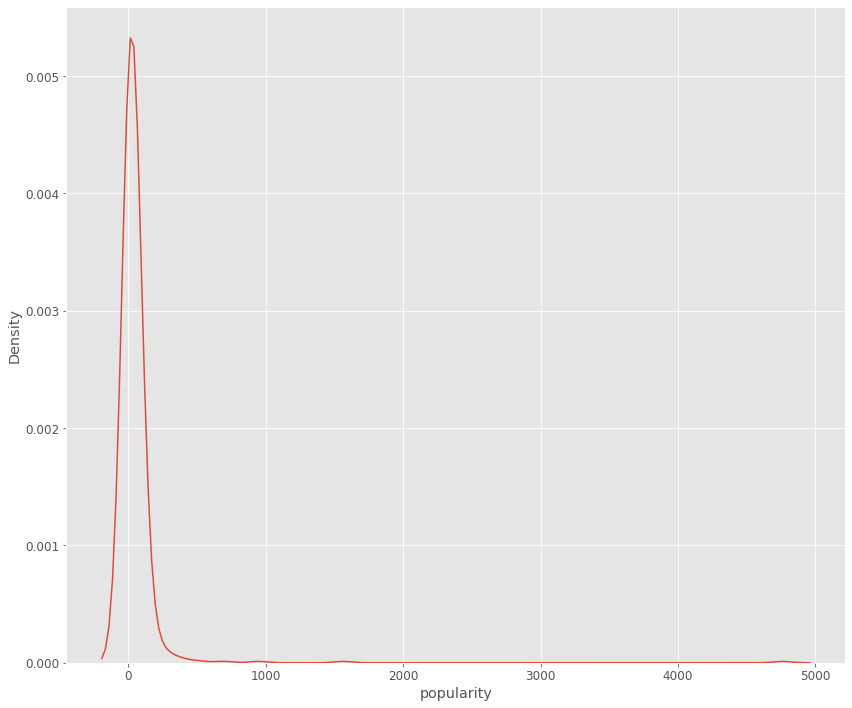

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

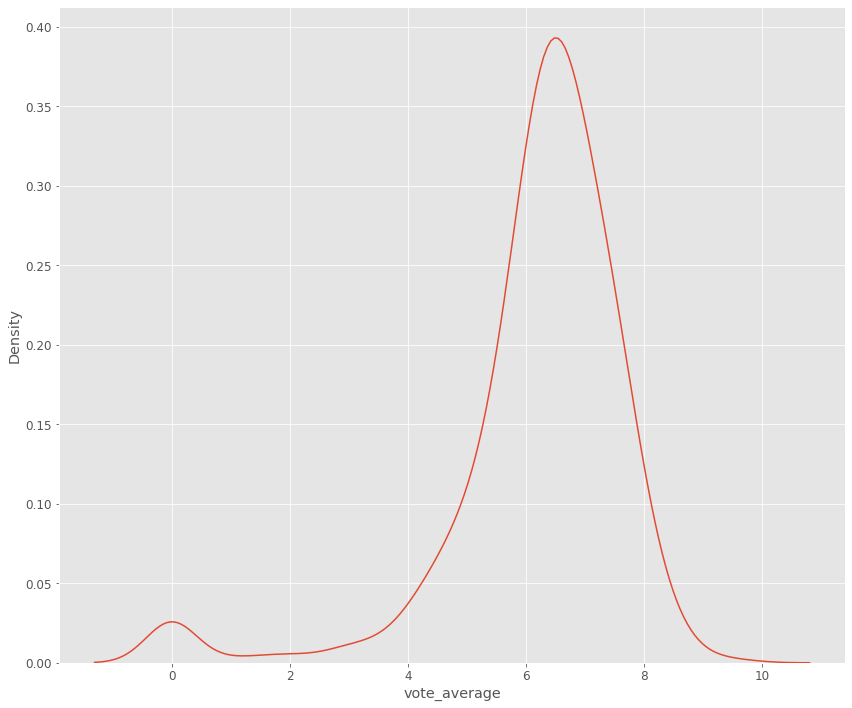

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

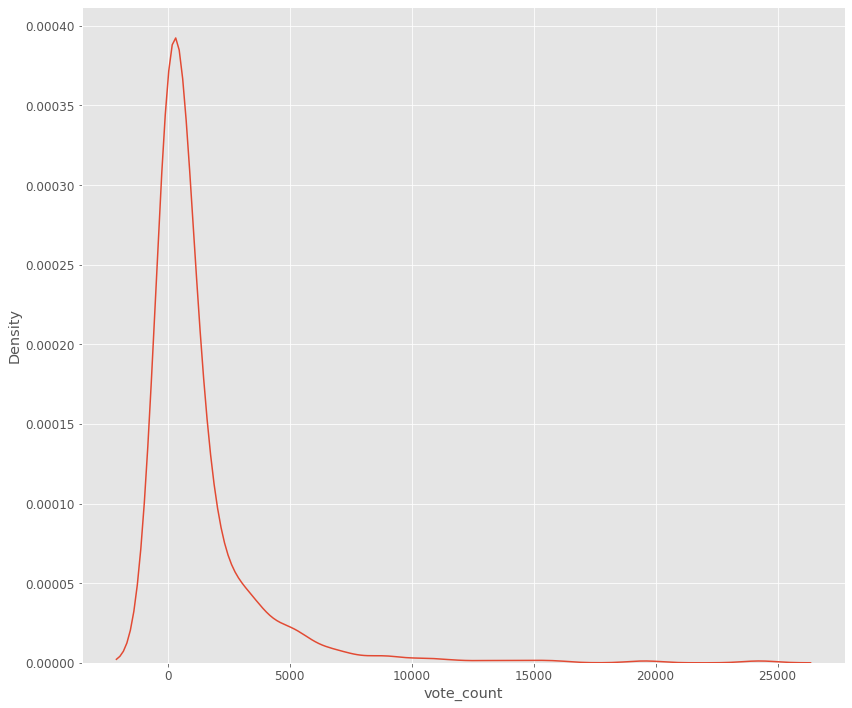

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

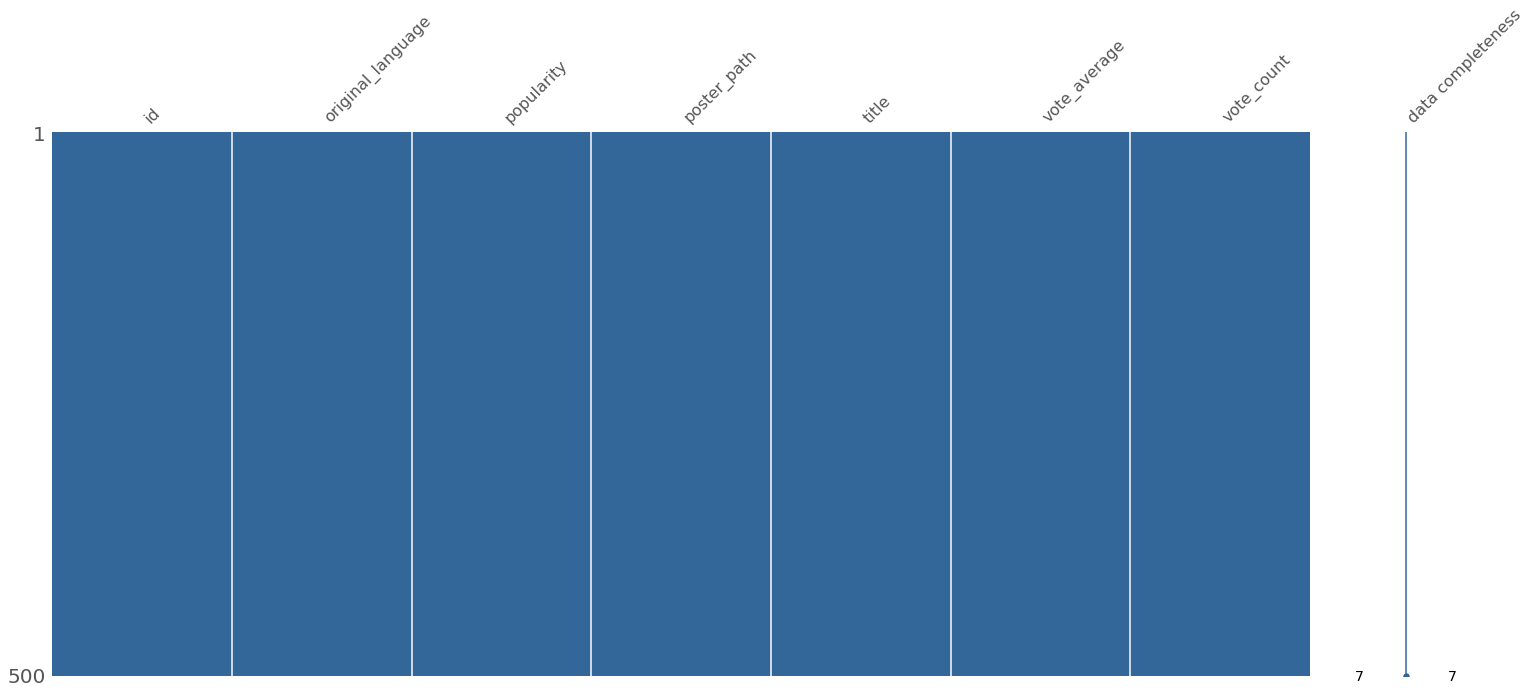

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

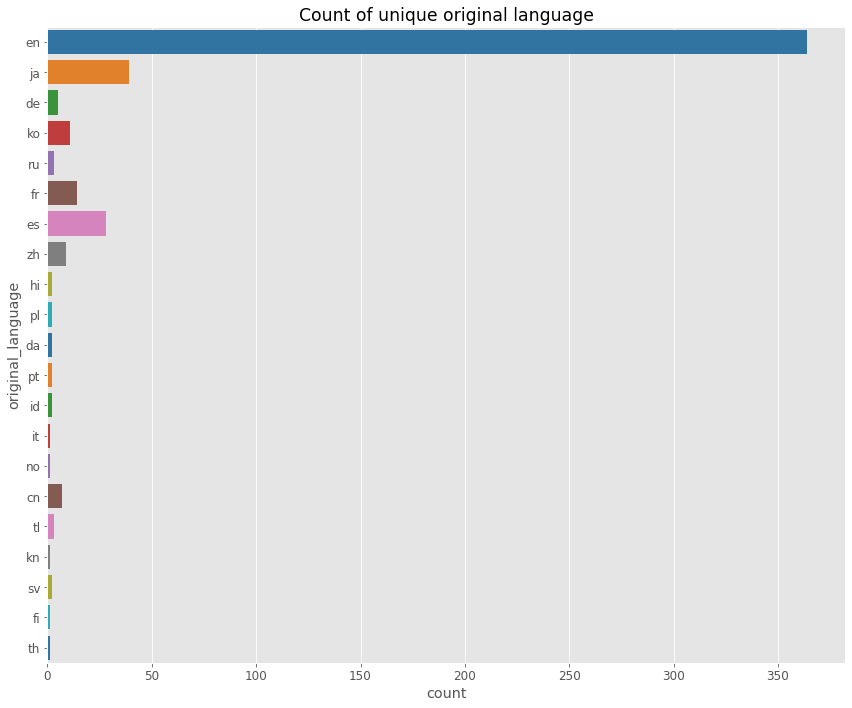

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

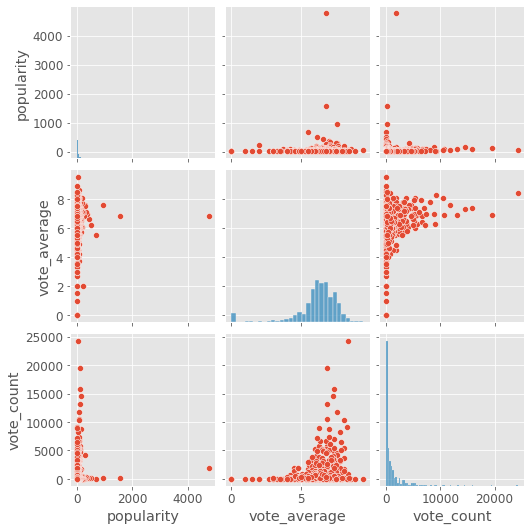

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.051647,0.036350
vote_average,0.051647,1.000000,0.230179
vote_count,0.036350,0.230179,1.000000


<AxesSubplot:>

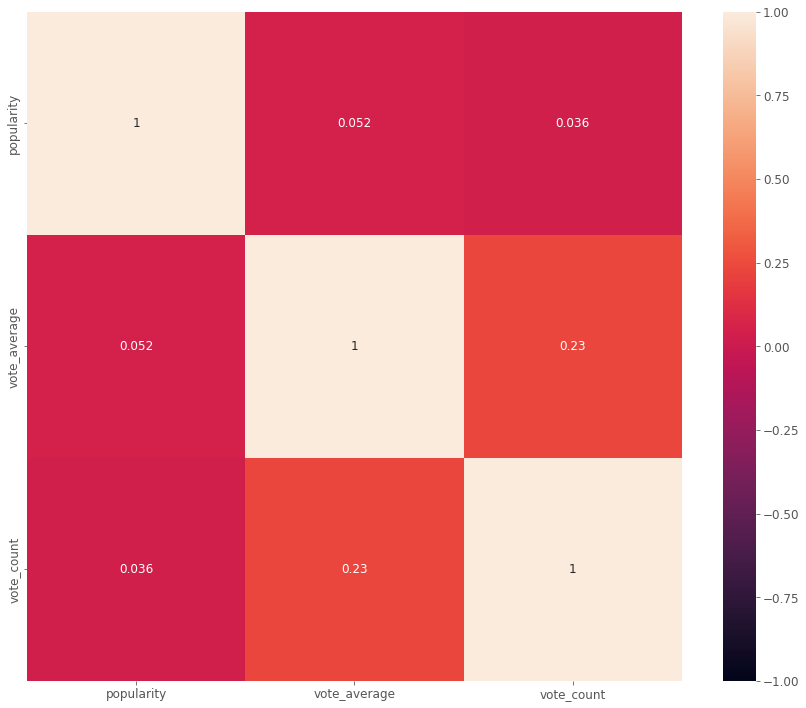

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

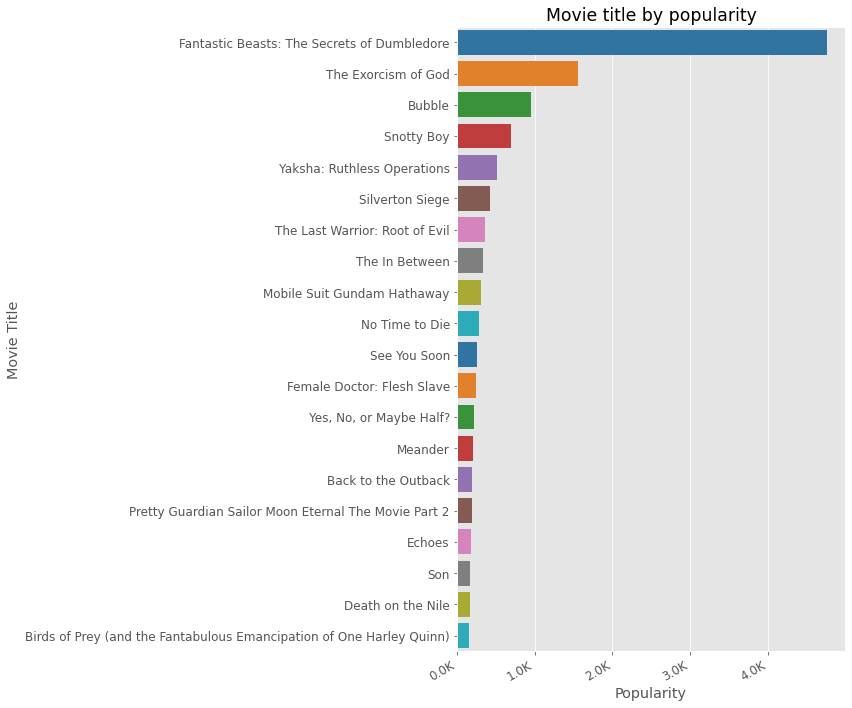

In [27]:
plot_bar(
  data=df.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='Popularity', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

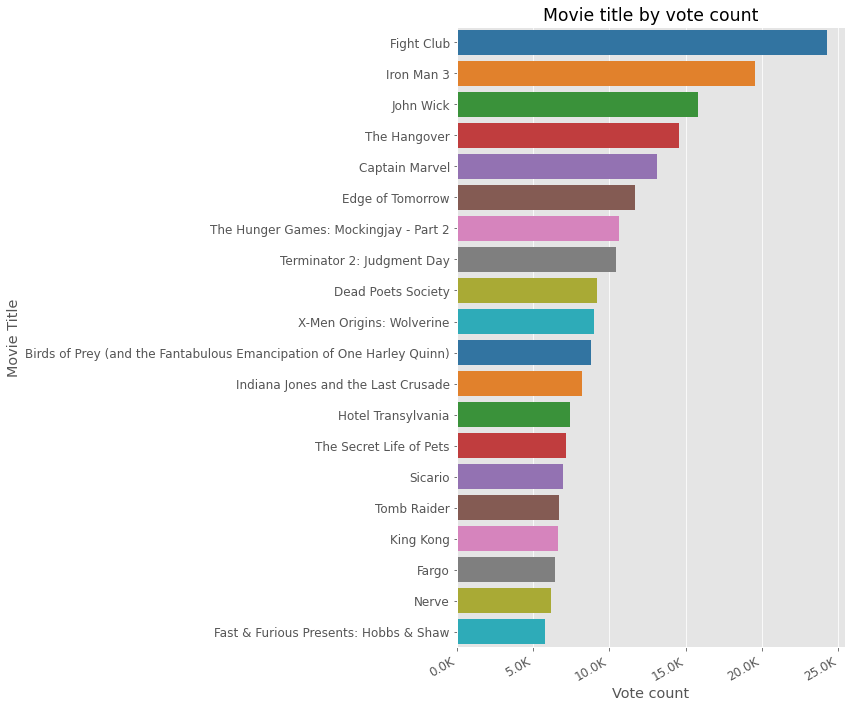

In [28]:
plot_bar(
  data=df.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='Vote count', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

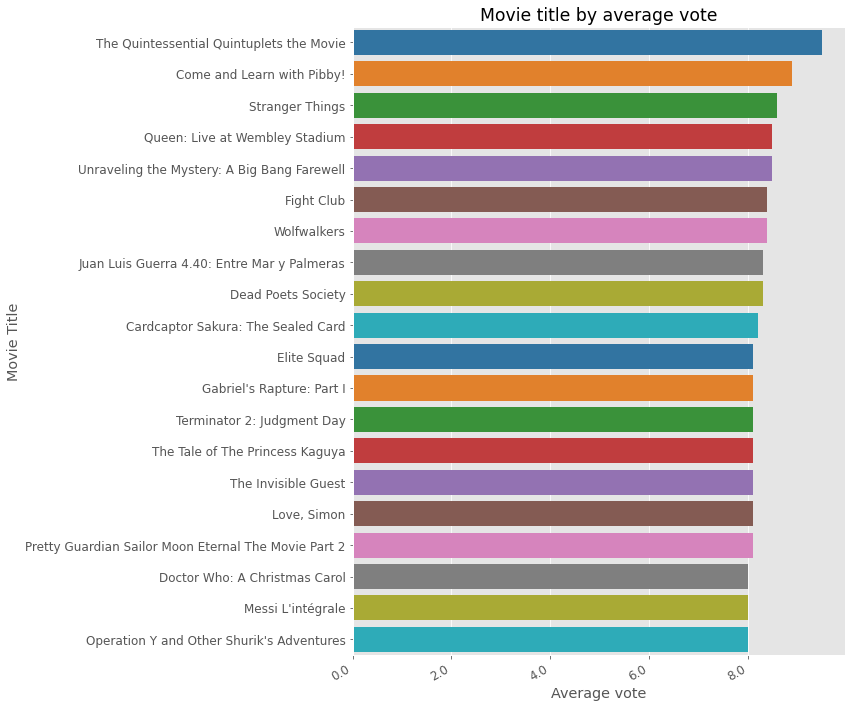

In [29]:
plot_bar(
  data=df.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Movie title by average vote', xlabel='Average vote', ylabel='Movie Title',
  formatter=format_orig
)

# Movies With Release Date

In [30]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

# query first 250 pages in popular movies
for pg in popular_movies[:250]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [31]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,4757.639,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1871
1,2,False,836225,en,1561.390,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245
2,3,False,912598,ja,949.924,/kk28Lk8oQBGjoHRGUCN2vxKb4O2.jpg,2022-02-14,Bubble,7.6,152
3,4,False,831728,de,692.172,/xvgmSslUbi416VwsW1C1Cp90yX.jpg,2022-01-13,Snotty Boy,5.5,2
4,5,False,606402,ko,515.495,/whZ8OkI7W8cBOmtoiFyb72Ekt3U.jpg,2022-04-08,Yaksha: Ruthless Operations,6.2,93


In [32]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,4757.639,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1871
1,836225,en,1561.390,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245
2,912598,ja,949.924,/kk28Lk8oQBGjoHRGUCN2vxKb4O2.jpg,2022-02-14,Bubble,7.6,152
3,831728,de,692.172,/xvgmSslUbi416VwsW1C1Cp90yX.jpg,2022-01-13,Snotty Boy,5.5,2
4,606402,ko,515.495,/whZ8OkI7W8cBOmtoiFyb72Ekt3U.jpg,2022-04-08,Yaksha: Ruthless Operations,6.2,93


In [33]:
df1.shape

(250, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 250 non-null    int64  
 1   original_language  250 non-null    object 
 2   popularity         250 non-null    float64
 3   poster_path        250 non-null    object 
 4   release_date       250 non-null    object 
 5   title              250 non-null    object 
 6   vote_average       250 non-null    float64
 7   vote_count         250 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.8+ KB


In [35]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [36]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [37]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [38]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4757.639,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1871,2022,4,6,Wednesday,14,2
1,836225,en,1561.390,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245,2022,3,11,Friday,10,1
2,912598,ja,949.924,/kk28Lk8oQBGjoHRGUCN2vxKb4O2.jpg,2022-02-14,Bubble,7.6,152,2022,2,14,Monday,7,1
3,831728,de,692.172,/xvgmSslUbi416VwsW1C1Cp90yX.jpg,2022-01-13,Snotty Boy,5.5,2,2022,1,13,Thursday,2,1
4,606402,ko,515.495,/whZ8OkI7W8cBOmtoiFyb72Ekt3U.jpg,2022-04-08,Yaksha: Ruthless Operations,6.2,93,2022,4,8,Friday,14,2


In [39]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,250.0,250,250,250,250,250
unique,250.0,16,250,243,250,7
top,89.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2021-05-27 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,184,1,2,1,74
first,NaN,NaN,NaN,1955-02-24 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-06-19 00:00:00,NaN,NaN


In [40]:
df1.drop(columns=['year', 'month', 'day', 'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,250.000000,250.00000,250.000000
mean,91.305592,6.52200,1944.216000
std,325.271843,1.07828,3148.425621
min,19.580000,0.00000,0.000000
25%,25.424250,6.00000,128.250000
50%,37.121500,6.60000,721.000000
75%,68.284500,7.20000,2489.500000
max,4757.639000,9.50000,24254.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

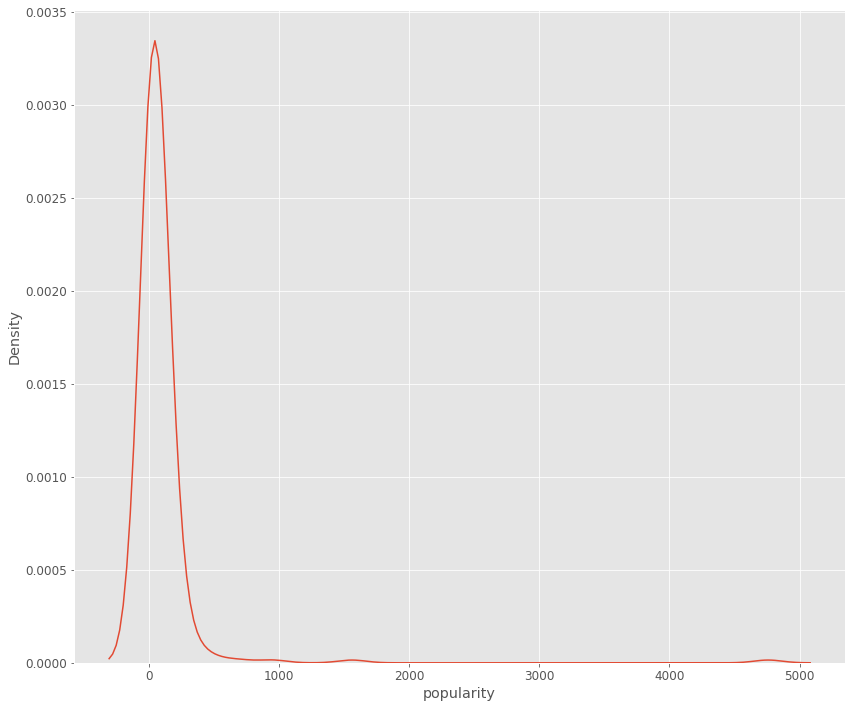

In [41]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

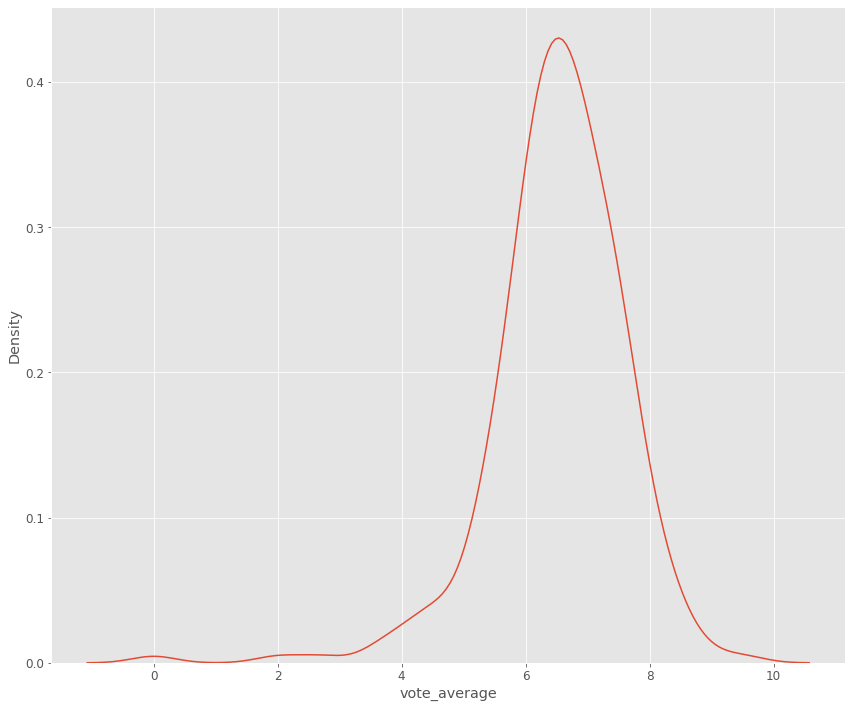

In [42]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

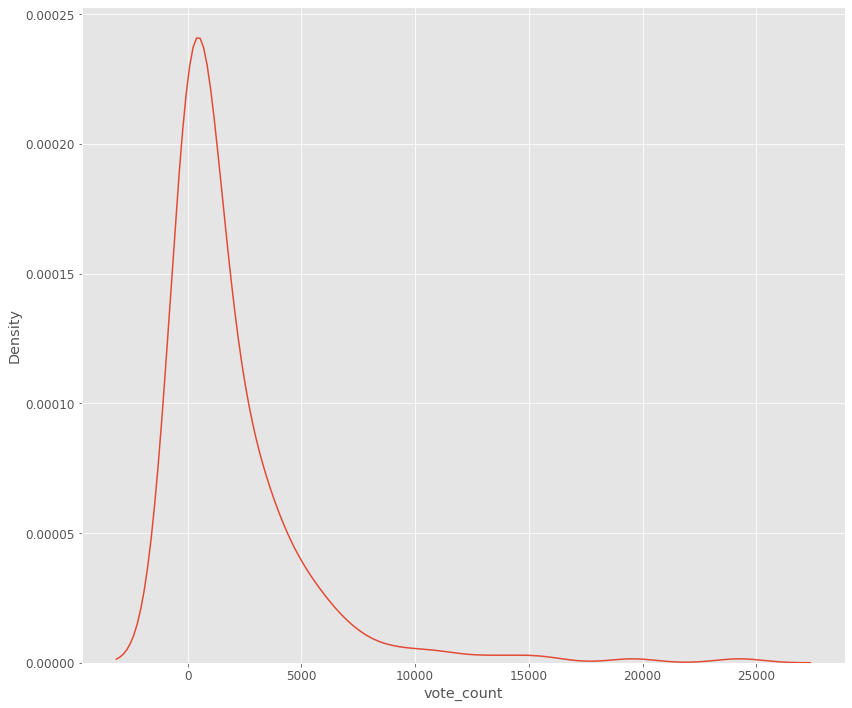

In [43]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [44]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

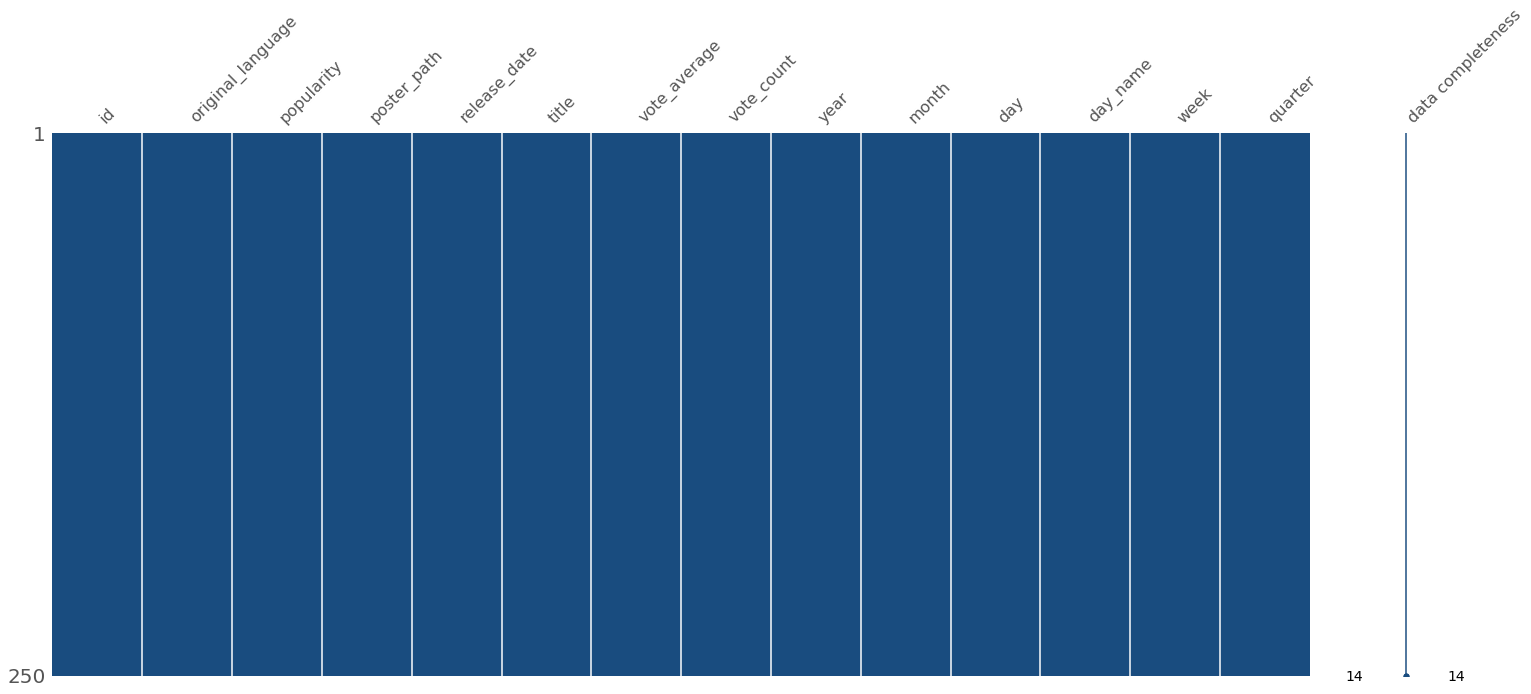

In [45]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [46]:
df1.duplicated().sum()                                # check for duplicates

0

In [47]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

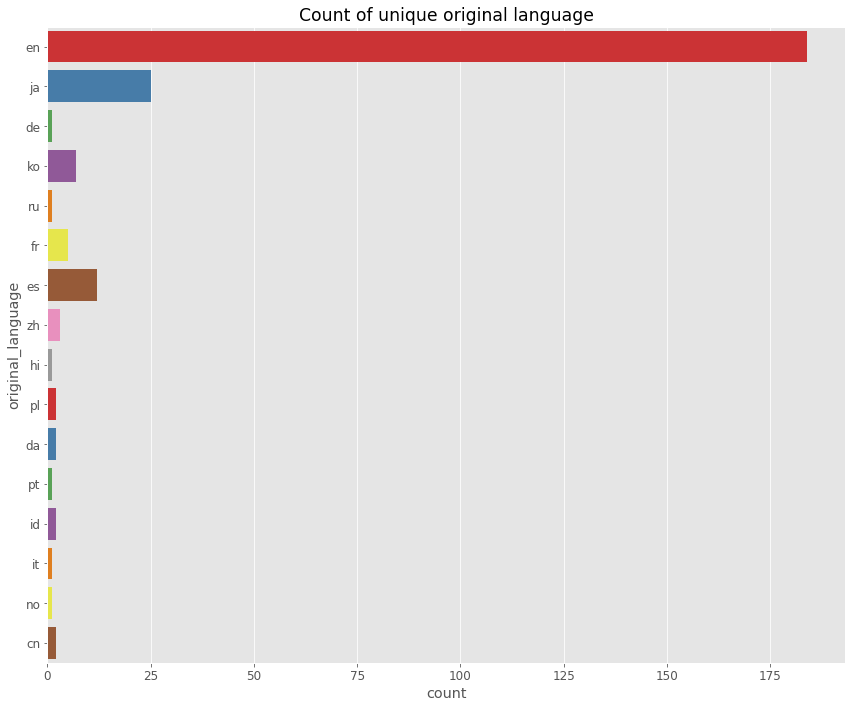

In [48]:
ax1 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax1.set(title='Count of unique original language')

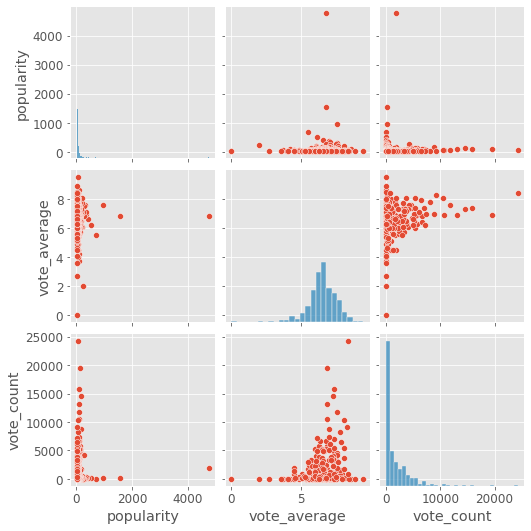

In [49]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [50]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.034676,-0.012356
vote_average,0.034676,1.000000,0.251496
vote_count,-0.012356,0.251496,1.000000


<AxesSubplot:>

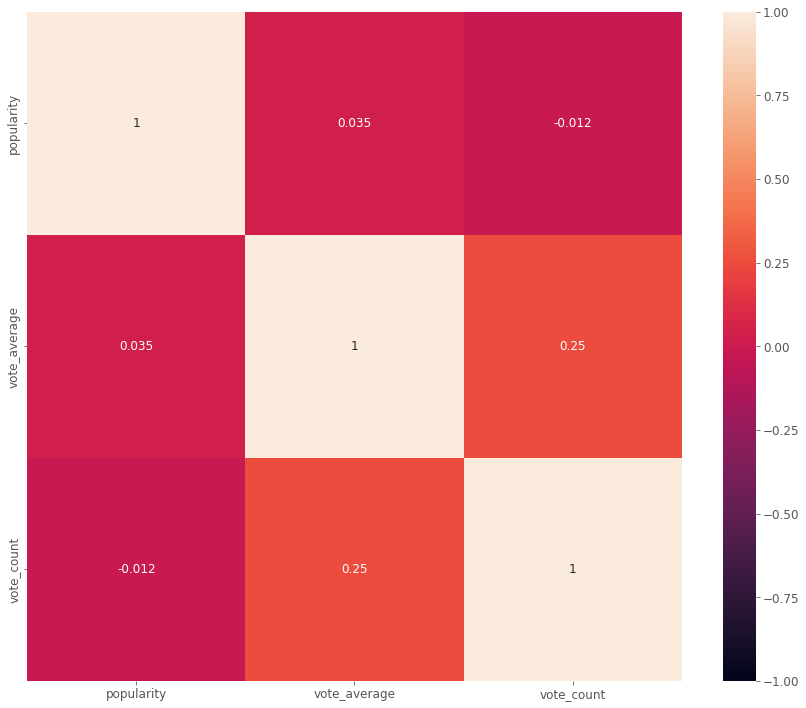

In [51]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='year', ylabel='popularity'>

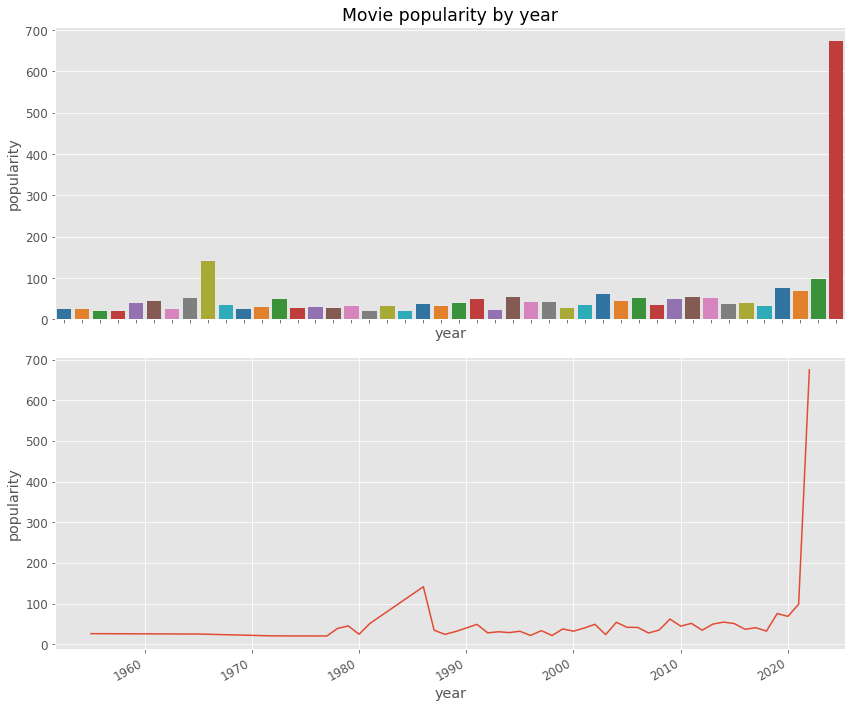

In [52]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie popularity by year')

sns.lineplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10',
  ax=axs2
)

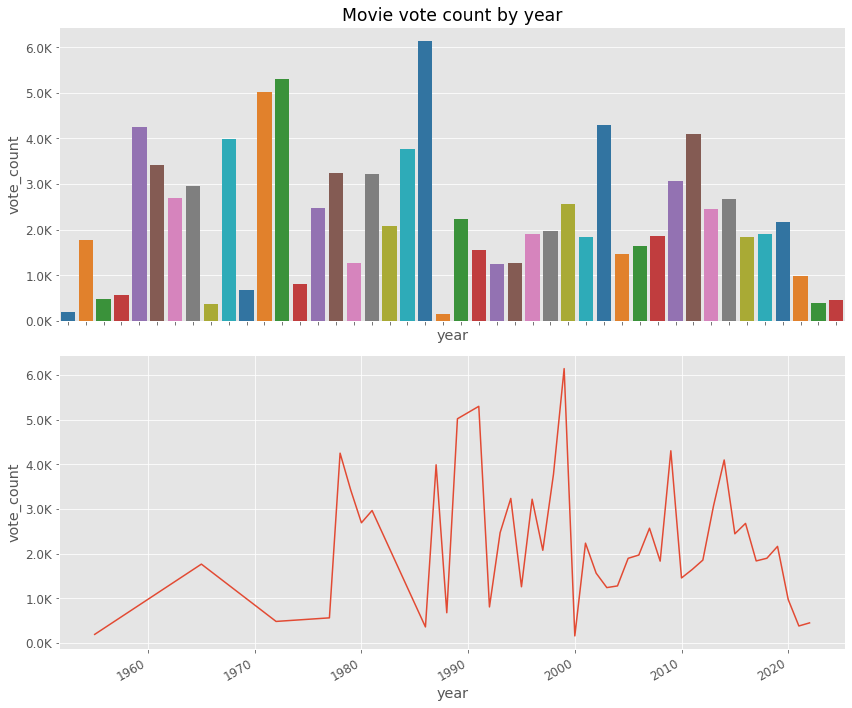

In [53]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='vote_count', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie vote count by year')

sns.lineplot(
  data=df1,
  x='year', y='vote_count', ci=None,
  palette='tab10',
  ax=axs2
)

# format yaxis
for axs in axs1, axs2:
  axs.yaxis.set_major_formatter(format_tsd)

<AxesSubplot:xlabel='year', ylabel='vote_average'>

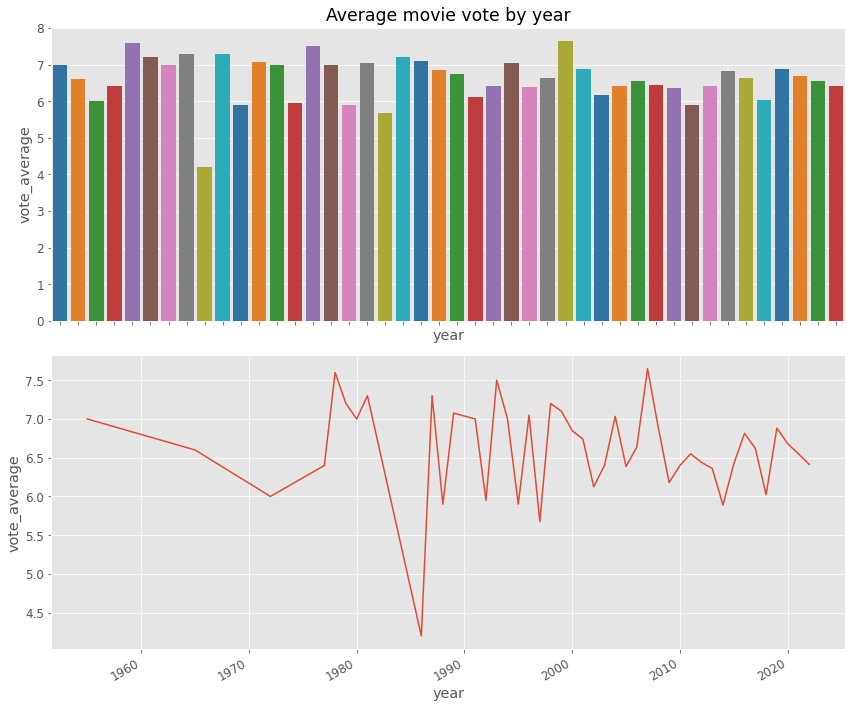

In [54]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='vote_average', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Average movie vote by year')

sns.lineplot(
  data=df1,
  x='year', y='vote_average', ci=None,
  palette='tab10',
  ax=axs2
)

<AxesSubplot:xlabel='month', ylabel='popularity'>

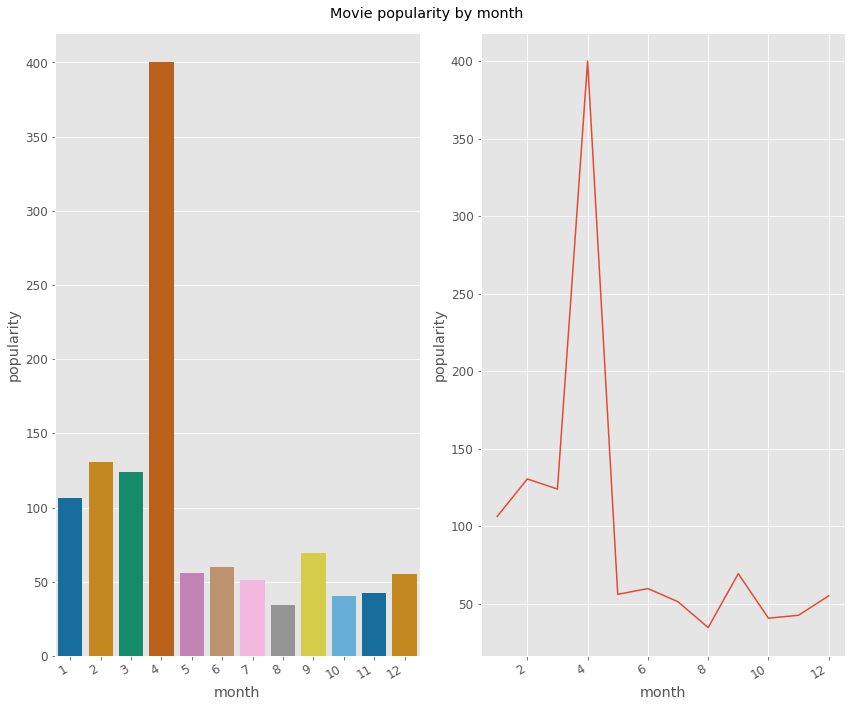

In [55]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(1, 2)
fig1.autofmt_xdate()
fig1.suptitle('Movie popularity by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='popularity', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='popularity', ci=None,
  palette='colorblind',
  ax=axs4
)

<AxesSubplot:xlabel='month', ylabel='vote_average'>

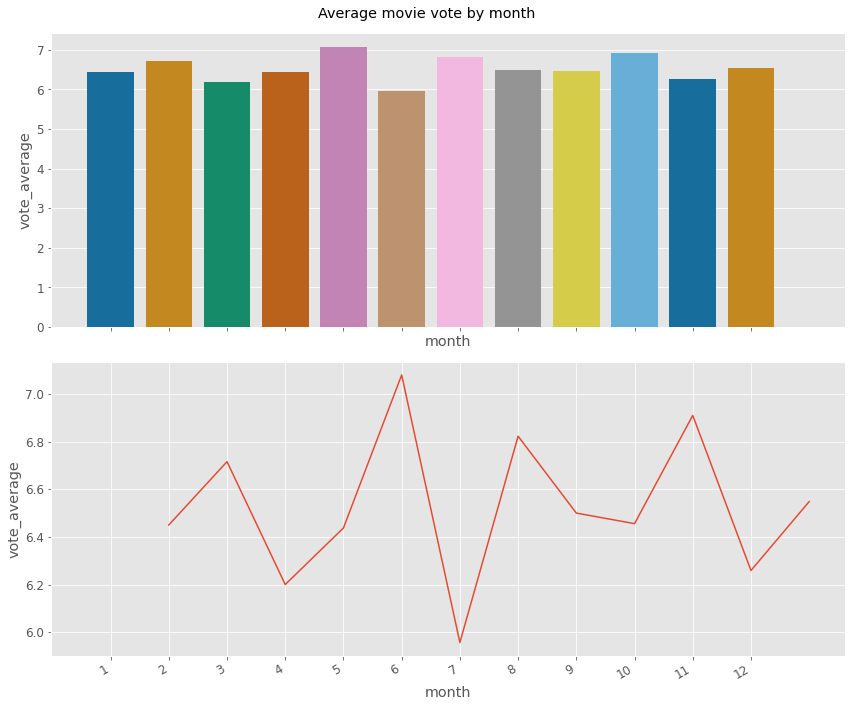

In [56]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(2, 1, sharex=True)
fig1.autofmt_xdate()
fig1.suptitle('Average movie vote by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='vote_average', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='vote_average', ci=None,
  palette='colorblind',
  ax=axs4
)

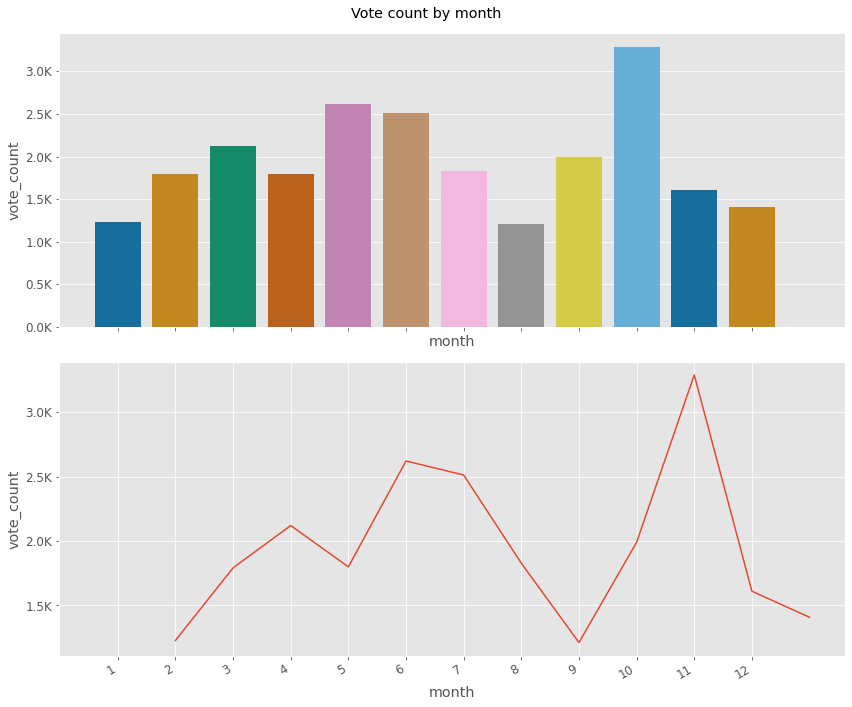

In [57]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(2, 1, sharex=True)
fig1.autofmt_xdate()
fig1.suptitle('Vote count by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='vote_count', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='vote_count', ci=None,
  palette='colorblind',
  ax=axs4
)

# set y-axis formatter
for axs in axs3, axs4:
  axs.yaxis.set_major_formatter(format_tsd)